In [ ]:
#! /usr/bin/env python
# -*- coding: utf-8 -*-
# Authors: Maxime Goffart and Olivier Joris

import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel
from sklearn.impute import KNNImputer

def load_data(data_path):
    """
    Load the data for the classifer.
    Method given with the assignment. Authors: Antonio Sutera & Yann Claes.

    Argument:
    ---------
    - `data_path`: Path to the data folder.
    """

    FEATURES = range(2, 33)
    N_TIME_SERIES = 3500

    # Create the training and testing samples
    LS_path = os.path.join(data_path, 'LS')
    TS_path = os.path.join(data_path, 'TS')
    X_train, X_test = [np.zeros((N_TIME_SERIES, (len(FEATURES) * 512))) for i in range(2)]

    for f in FEATURES:
        data = np.loadtxt(os.path.join(LS_path, 'LS_sensor_{}.txt'.format(f)))
        X_train[:, (f-2)*512:(f-2+1)*512] = data
        data = np.loadtxt(os.path.join(TS_path, 'TS_sensor_{}.txt'.format(f)))
        X_test[:, (f-2)*512:(f-2+1)*512] = data
    
    y_train = np.loadtxt(os.path.join(LS_path, 'activity_Id.txt'))

    print('X_train size: {}.'.format(X_train.shape))
    print('y_train size: {}.'.format(y_train.shape))
    print('X_test size: {}.'.format(X_test.shape))

    return X_train, y_train, X_test


def write_submission(y, where, submission_name='toy_submission.csv'):
    """
    Method given with the assignment. Authors: Antonio Sutera & Yann Claes.

    Arguments:
    ----------
    - `y`: Predictions to write.
    - `where`: Path to the file in which to write.
    - `submission_name`: Name of the file.
    """

    os.makedirs(where, exist_ok=True)

    SUBMISSION_PATH = os.path.join(where, submission_name)
    if os.path.exists(SUBMISSION_PATH):
        os.remove(SUBMISSION_PATH)

    y = y.astype(int)
    outputs = np.unique(y)

    # Verify conditions on the predictions
    if np.max(outputs) > 14:
        raise ValueError('Class {} does not exist.'.format(np.max(outputs)))
    if np.min(outputs) < 1:
        raise ValueError('Class {} does not exist.'.format(np.min(outputs)))
    
    # Write submission file
    with open(SUBMISSION_PATH, 'a') as file:
        n_samples = len(y)
        if n_samples != 3500:
            raise ValueError('Check the number of predicted values.')

        file.write('Id,Prediction\n')

        for n, i in enumerate(y):
            file.write('{},{}\n'.format(n+1, int(i)))

    print('Submission {} saved in {}.'.format(submission_name, SUBMISSION_PATH))

def compute_proportion_subjects():
    """
    Compute the proportions of the subjects and the activities.
    """

    LS = np.loadtxt(os.path.join('data/LS', 'subject_Id.txt'))
    activity = np.loadtxt(os.path.join('data/LS', 'activity_Id.txt'))

    unique_activity, count_activity = np.unique(activity, return_counts = True)
    unique_ls, count_ls = np.unique(LS, return_counts = True)
    
    plt.bar(unique_activity, count_activity, width=0.5, bottom=None, align='center', data=None)
    plt.title("Repartition of the activties in the learning set")
    plt.xlabel("activity id")
    plt.ylabel("number of instances")
    plt.show()
    
    plt.bar(unique_ls, count_ls, width=0.5, bottom=None, align='center', data=None)
    plt.title("Repartition of the subject id in the learning set")
    plt.xlabel("subject id")
    plt.ylabel("number of instances")
    plt.show()

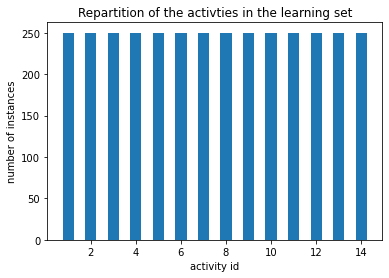

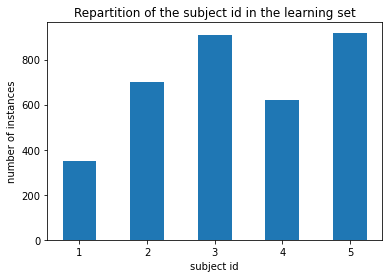

In [4]:
if __name__ == '__main__':
    # Compute proportion of subjects
    compute_proportion_subjects()

In [86]:
    # Directory containing the data folders
    DATA_PATH = 'data'
    X_train, y_train, X_test = load_data(DATA_PATH)

X_train size: (3500, 15872).
y_train size: (3500,).
X_test size: (3500, 15872).


In [87]:
    # Replace missing values
    imputer = KNNImputer(n_neighbors = 5, weights = 'distance', missing_values = -999999.99)
    X_train = imputer.fit_transform(X_train)

[[122.79       122.78       122.77       ... -22.3310319  -21.82152139
  -21.82350506]
 [ 66.          66.          66.         ... -23.83       -23.83
  -23.83      ]
 [100.         100.         100.         ... -25.39       -25.34
  -25.39      ]
 ...
 [126.53       126.54       126.55       ... -18.94137966 -18.25588232
  -17.89140167]
 [ 76.8         76.81        76.82       ... -37.95       -37.95
  -37.95      ]
 [ 95.38        95.41        95.44       ... -17.15       -17.15
  -17.15      ]]


In [88]:
    # Features selection
    etc = ExtraTreesClassifier(n_estimators = 1000, random_state = 0)
    
    print("Shape before feature selection: " + str(X_train.shape))
    
    selector = SelectFromModel(estimator = etc).fit(X_train, y_train)
    X_train = selector.transform(X_train)
    X_test = selector.transform(X_test)
    
    print("Shape after feature selection: " + str(X_train.shape))

Shape before feature selection: (3500, 15872)
Shape after feature selection: (3500, 4723)
[[122.79       122.78       122.77       ... -24.76446496 -22.33510536
  -21.82350506]
 [ 66.          66.          66.         ... -23.83       -23.83
  -23.83      ]
 [100.         100.         100.         ... -26.66       -25.34
  -25.39      ]
 ...
 [126.53       126.54       126.55       ... -23.07884099 -20.31072252
  -17.89140167]
 [ 76.8         76.81        76.82       ... -37.95       -37.95
  -37.95      ]
 [ 95.38        95.41        95.44       ... -17.15       -17.15
  -17.15      ]]
